#### 1. Introduction - Computer Vision

From https://www.tutorialspoint.com/artificial_intelligence_with_python/artificial_intelligence_with_python_computer_vision.htm:

Computer vision is a discipline that studies how to reconstruct, interrupt and understand a 3d scene from its 2d images, in terms of the properties of the structure present in the scene.

**_Computer Vision Hierarchy_**

Computer vision is divided into three basic categories as following −

* Low-level vision − It includes processing images for feature extraction.

* Intermediate-level vision − It includes object recognition and 3D scene interpretation

* High-level vision − It includes conceptual description of a scene like activity, intention and behavior.


**_Computer Vision Vs Image Processing_**

Image processing studies image to image transformation. The input and output of image processing are both images.

Computer vision is the construction of explicit, meaningful descriptions of physical objects from their image. The output of computer vision is a description or an interpretation of structures in 3D scene.

_Applications_

Computer vision finds applications in the following fields −

* Robotics

    * Localization-determine robot location automatically

    * Navigation
    
    * Obstacles avoidance
    
    * Assembly (peg-in-hole, welding, painting)
    
    * Manipulation (e.g. PUMA robot manipulator)
    
    * Human Robot Interaction (HRI): Intelligent robotics to interact with and serve people
    
* Medicine

    * Classification and detection (e.g. lesion or cells classification and tumor detection)

    * 2D/3D segmentation

    * 3D human organ reconstruction (MRI or ultrasound)

    * Vision-guided robotics surgery

* Security

    * Biometrics (iris, finger print, face recognition) --- **Below will be a simple face detection.**

    * Surveillance-detecting certain suspicious activities or behaviors
    
* Transportation

    * Autonomous vehicle

    * Safety, e.g., driver vigilance monitoring

    * Industrial Automation Application

* Industrial inspection (defect detection)

    * Assembly

    * Barcode and package label reading

    * Object sorting

    * Document understanding (e.g. OCR)

#### 2. Import Libraries

In [53]:
import cv2
import numpy as np

From https://opencv.org/about/:

* OpenCV (Open Source Computer Vision Library, which cv2 is built on) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products.

#### 3. Face Detection

In [54]:
face_detection = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

from https://ersanpreet.wordpress.com/tag/haarcascade_frontalface_default-xml/#:~:text=It%20uses%20the%20function%20detectMultiScale,such%20as%20scaling%20and%20neighbours :

* Haar cascade is an algorithm that can detect objects in images, irrespective of their scale in image and location. The above will allow us to detect frontward facing faces.

In [63]:
from urllib.request import urlopen

image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSHScqJ4EpOXyasknWxKjVs1TN-F-4ySkH1ISzXWMBeZg&s"
resp = urlopen(image_url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_COLOR) # The image object

Above from https://stackoverflow.com/questions/21061814/how-can-i-read-an-image-from-an-internet-url-in-python-cv2-scikit-image-and-mah:

* Here we take an image from online (image_url), open it with the urllib module (resp), returns the image as an array of bytes (image), and then reconvert it to an image with the intent to view it in color (img).

In [62]:
type(img)

numpy.ndarray

* As we can see, it is still in the form of an array, put it's a picture.

In [56]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

* This converts the color space of the image to gray.

In [57]:
faces = face_detection.detectMultiScale(gray, 1.3, 5)

From https://docs.opencv.org/3.4/d1/de5/classcv_1_1CascadeClassifier.html#aaf8181cb63968136476ec4204ffca498:

* DetectMultiScale detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles.

In [58]:
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,0),3)
cv2.imwrite('Face.jpg',img)

True

From https://www.geeksforgeeks.org/python-opencv-cv2-rectangle-method/:

* Rectangle draws rectangles on an image.

    * img = image for rectangle to be drawn on
    
    * (x,y) = starting point of the rectangle
    
    * (x+w, y+h) = ending point of the rectangle
    
    * (255,0,0) = Color for borderline of rectangle to be drawn. For BGR, (255,0,0) will be red.
    
    * 3 = Thickness of rectangle border line.
    
Imwrite creates an image named Face.jpg with face detection as shown below.

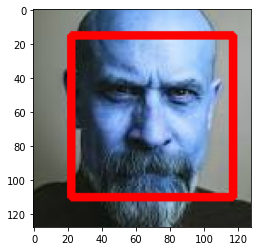

In [59]:
import matplotlib.pyplot as plt

plt.imshow(img)

**We can see the image background is gray, the rectangle is around the face, and it's thick and red. A very simple introduction to detecting faces!**